In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import healpy as hp

In [2]:
# Don't need this right now, but in case I want to convert between galactic and ecliptic later.
hp.Rotator(coord=["G", "E"])

[ [('G', 'E')], [array([0., 0., 0.])], [False] ]

In [3]:
m_857 = hp.read_map("skymaps/HFI_SkyMap_857_2048_R1.10_nominal.fits")

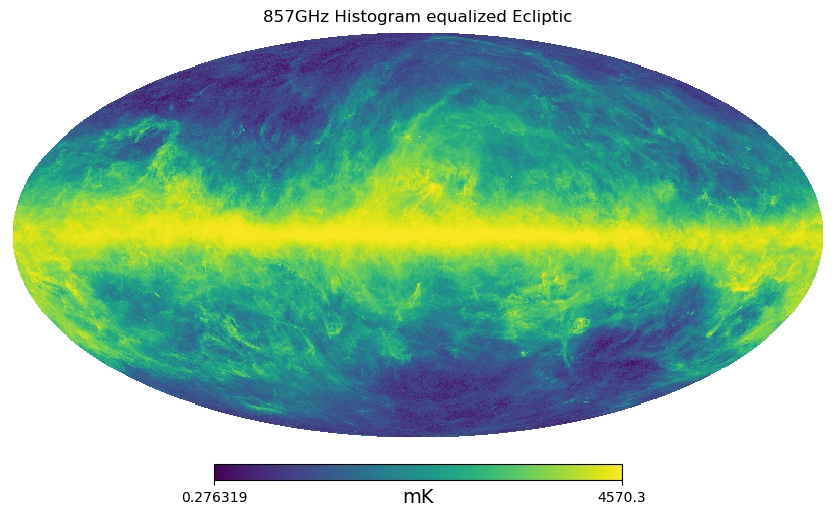

In [4]:
hp.mollview(
    m_857,
    #coord=["G", "E"],
    title="857GHz Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
)

In [5]:
def loc2data(map_array: np.ndarray, loc: list, circ_rad: int, cutout_rad: int, side_len: int = 0, range_max: int = 0) -> np.ndarray:
    '''
    Plot and/or return data around given locations on a map.
    
    Args:
        map_array: 1d numpy array of pixels in healpy Ring format.
        loc: a longitude and latitude location on the map in radians.
        circ_rad: radius of the disk around the location to be considered.
        cutout_rad: radius of the pixels within the circle to be set to 0.
        side_len (optional): length of one side of the returned 2d array/image.
    Returns:
        data_2d: 2d numpy array of pixels representing the image that is drawn.
    '''
    
    nside = hp.get_nside(map_array)

    vec_rad = loc
    vec_deg = np.rad2deg(vec_rad)
    vec_3d = hp.ang2vec(*vec_deg, lonlat=True)
    vec_pix = hp.vec2pix(nside, *vec_3d)

    ipix_disc = hp.query_disc(nside=nside, vec=vec_3d, radius=circ_rad)
    subdisc = hp.query_disc(nside=nside, vec=vec_3d, radius=cutout_rad)

    submap = np.zeros(hp.nside2npix(nside=nside))
    disc_values = map_array[ipix_disc]
    subdisc_values = map_array[subdisc]
    submap[ipix_disc] = disc_values
    submap[subdisc] = 0
    if range_max == 0:
        range_max = max(subdisc_values)

    hp.mollview(
        submap,
        #rot=[90, 0],
        title="Submap with center removed",
        unit="mK",
        max=range_max,
        #norm="hist",
    )

    if side_len == 0:
        side_len = circ_rad * 4700
    data_2d = hp.gnomview(
        submap,
        rot=[90, 0],
        xsize=side_len,
        title="Submap Gnomonic Projection (zoomed in)",
        unit="mK",
        max=range_max,
        #norm="hist",
        return_projected_map=True
    )
    
    return data_2d

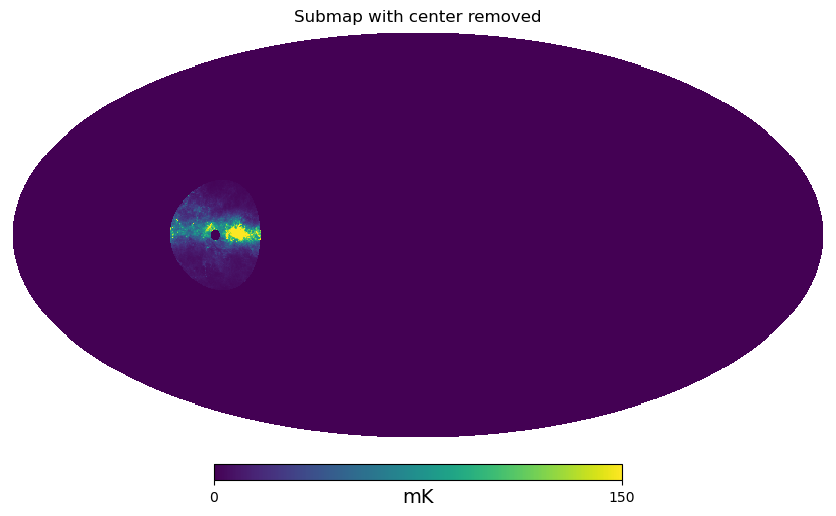

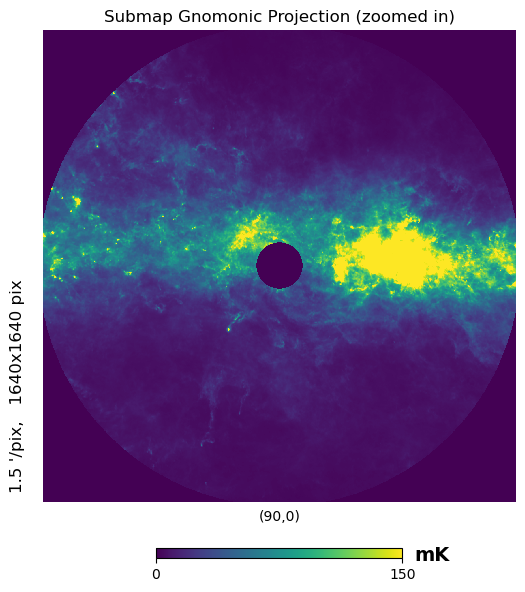

In [6]:
map = m_857
loc = [np.pi / 2, 0]
circ_radius = np.pi / 9
cutout_radius = circ_radius / 10
range_max = 150
data = loc2data(m_857, loc, circ_radius, cutout_radius, range_max=range_max)

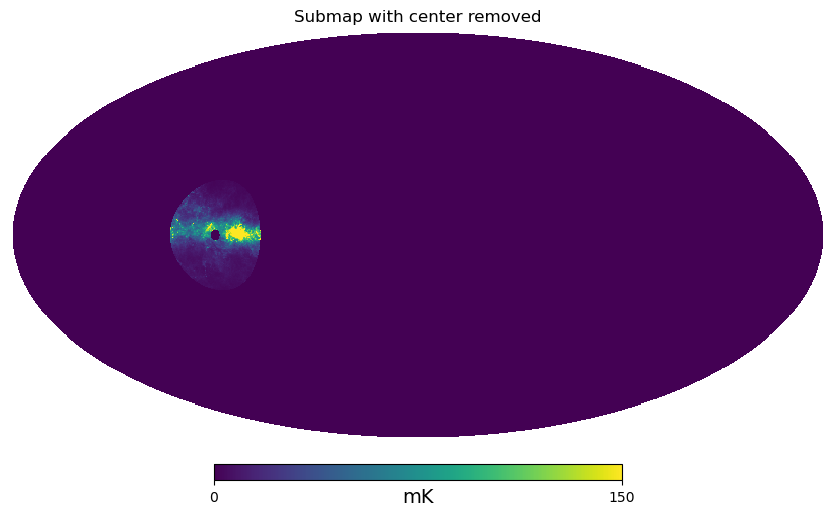

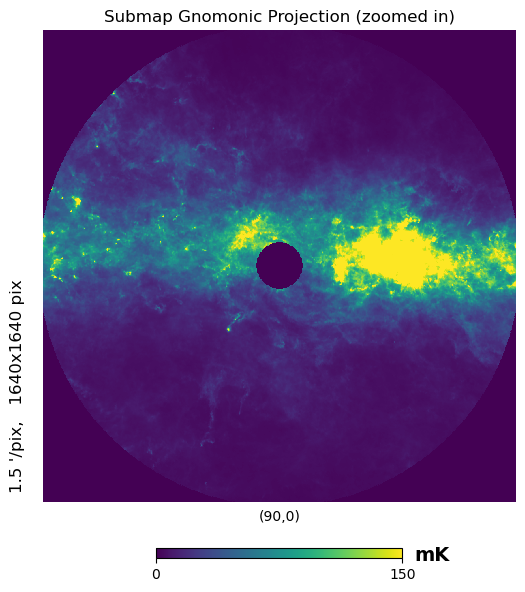

In [7]:
m_857_1024 = hp.ud_grade(m_857, 1024)
loc = [np.pi / 2, 0]
circ_radius = np.pi / 9
cutout_radius = circ_radius / 10
range_max = 150
data = loc2data(m_857_1024, loc, circ_radius, cutout_radius, range_max=range_max)

In [8]:
len(m_857)

50331648

In [9]:
data_list = data.tolist()
data_list[238][743]

4.560972690582275